In [ ]:
# Import libraries @Gauarav Lute @@@
import pandas as pd
from datetime import datetime
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [8]:
datesparse = lambda x : datetime.strftime(x, '%Y-%m-%d')

In [10]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)

In [12]:
series.head(10)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


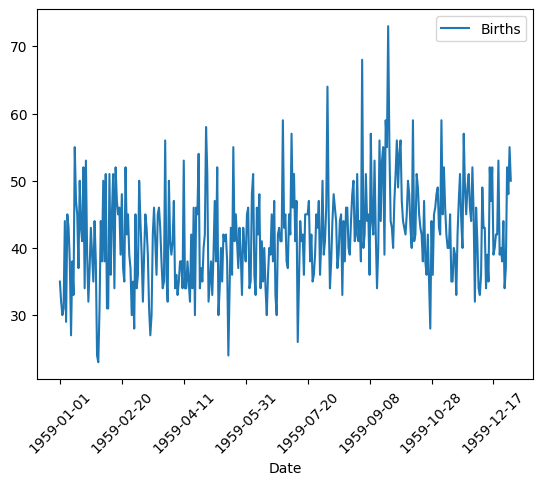

In [17]:
# visualize the data 
series.plot(legend=True)
plt.xticks(rotation= 45) # Adjust the rotation angle as needed
plt.show()

In [19]:
# perform adf test 
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statisti : %f' % result[0])
    print('p-value: %f' % result[1])

In [22]:
result = adfuller(series)
print('ADF Statistics: %f' % result[0])
print('P-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -4.808291
P-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


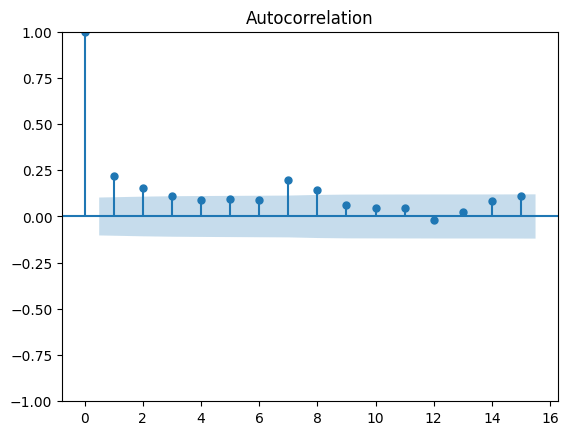

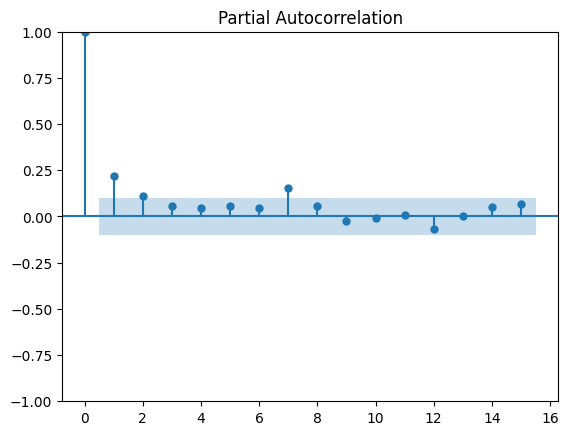

In [ ]:
# Visualize Autocorrelation and partial correlation
plot_acf(series, lags=15)
plot_pacf(series, lags=15)
plt.show()

In [25]:
# We can Check AR(1), AR(2), AR(7)

In [29]:
ar_orders = [1,2,7]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    # Create AR(p) model 
    ar_model = ARIMA(series, order= (ar_order, 0, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\P

In [ ]:
# print AIC
for ar_order in ar_orders:
    print('AIC for AR(%s) : %s' %(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1) : 2479.0806278346026
AIC for AR(2) : 2476.363657107157
AIC for AR(7) : 2472.7782626290145


In [ ]:
# Print BIC
for ar_order in ar_orders :
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 2490.78031989535
BIC for AR(2): 2491.963246521487
BIC for AR(7): 2507.877338811257


In [34]:
# If we treat this as a ARIMA process

In [42]:
from itertools import product

p_values = range(1,3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model 
    arma_model = ARIMA(series, order=(p,0,q))
    arma_model_fit = arma_model.fit()

    # Store AIC and BIC scores 
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic

    fitted_model_dict[(p, q)] = {'AIC' : aic_score, 'BIC' : bic_score}

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Gaurav Lute\AppData\Local\P

In [43]:
for (p,q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')


ARMA(1,1) - AIC: 2468.905798032971, BIC: 2484.5053874473006
ARMA(1,2) - AIC: 2466.724037900288, BIC: 2486.2235246682003
ARMA(2,1) - AIC: 2466.2832664578127, BIC: 2485.782753225725
ARMA(2,2) - AIC: 2467.6978577829286, BIC: 2491.0972419044238


In [44]:
def parser(s):
    return datetime.strftime(s, '%Y-%m-%d')

In [52]:
# Read the CSV file as a DataFrame
df = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0)  # Removed squeeze=True

# If the dataset has only one column and you want a Series
series = df.iloc[:, 0]

# Set frequency and transform
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004, 1, 1):]
series = series.diff().diff().dropna()

In [53]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: %f' %result[0])
    print('P-value: %f' % result[1])

In [54]:
perform_adf_test(series)

ADF Statistics: -7.162321
P-value: 0.000000


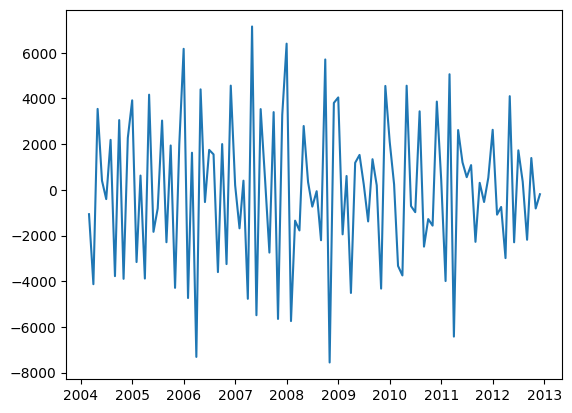

In [55]:
plt.plot(series)

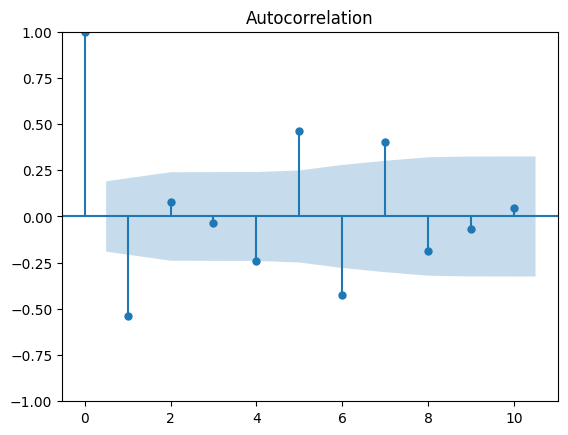

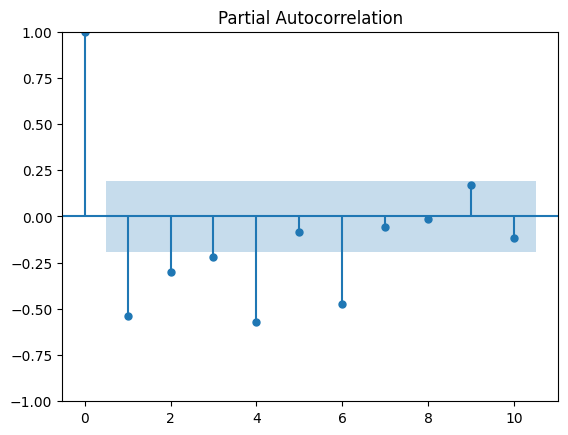

In [57]:
plot_acf(series, lags=10)
plot_pacf(series, lags=10)
plt.show()

In [59]:
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):

    # Create AR(p) model 
    ar_model = ARIMA(series, order= (ar_order, 0, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit

In [60]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.609985266004
AIC for AR(6): 1899.649744142968
AIC for AR(10): 1902.3765450053108


In [61]:
# Bic comparison 
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198306764
BIC for AR(6): 1920.9572568958647
BIC for AR(10): 1934.3378141346557


In [ ]:
###########